In [78]:
import pandas as pd
import bs4 as bs 
import numpy as np
import os
from PIL import Image
import codecs, json
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
curr_dir = os.getcwd()
tar_dir = curr_dir + '/data/sentiment'

In [128]:
file = os.listdir(tar_dir)[0]
path = tar_dir + '/' + file

In [82]:
df = pd.read_csv(path, sep=',',error_bad_lines=False)
df.head()

,Unnamed: 0,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,retweet,clean_text,language,sentiment
0,0,VpaJimenez,2019-02-25 18:59,0,1,El sábado # 23Feb fue un día en el cual el mun...,NaN,NaN,# #,1.100184e+18,https://twitter.com/VpaJimenez/status/11001836...,El sábado # 23Feb fue un día en el cual el mun...,El sábado fue un día en el cual el mundo pudo...,es,0.657344
1,1,ValenciaHoy,2019-02-25 18:59,2,0,Alcalde Johan Castañeda lideró jornadas deport...,NaN,NaN,# #,1.100184e+18,https://twitter.com/ValenciaHoy/status/1100183...,Alcalde Johan Castañeda lideró jornadas deport...,Alcalde Johan Castañeda lideró jornadas deport...,es,0.535592
2,2,GabrielParraDic,2019-02-25 18:59,0,0,# Repost @ 2001online (get_repost) ・・・ Otro mi...,NaN,@,# # # #,1.100184e+18,https://twitter.com/GabrielParraDic/status/110...,# Repost @ 2001online (get_repost) ・・・ Otro mi...,get_repost Otro militar venezolano cru...,es,0.601500
3,3,emejiasva,2019-02-25 18:57,2,1,"El Guernica "" venezolano.. fotografías. # 23F...",NaN,NaN,#,1.100183e+18,https://twitter.com/emejiasva/status/110018292...,"El Guernica "" venezolano.. fotografías. # 23F...",El Guernica venezolano fotografías,es,0.505551
4,4,JHONNILSON,2019-02-25 18:56,0,0,QUE ALGUIEN ME DIGA # yosoyvoluntarioxvenezuel...,NaN,NaN,# # # # # # # #,1.100183e+18,https://twitter.com/JHONNILSON/status/11001828...,QUE ALGUIEN ME DIGA # yosoyvoluntarioxvenezuel...,QUE ALGUIEN ME DIGA,es,0.308206


In [83]:
# change date to datetime object
df['date'] = pd.to_datetime(df.date)

In [84]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65201 entries, 0 to 65200
Data columns (total 15 columns):
Unnamed: 0    65201 non-null int64
username      65201 non-null object
date          65201 non-null datetime64[ns]
retweets      65201 non-null int64
favorites     65201 non-null int64
text          65201 non-null object
geo           18 non-null object
mentions      18251 non-null object
hashtags      65183 non-null object
id            65183 non-null float64
permalink     65183 non-null object
retweet       65201 non-null object
clean_text    65201 non-null object
language      65201 non-null object
sentiment     65066 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 7.5+ MB
None


,Unnamed: 0,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,retweet,clean_text,language,sentiment
0,0,VpaJimenez,2019-02-25 18:59:00,0,1,El sábado # 23Feb fue un día en el cual el mun...,NaN,NaN,# #,1.100184e+18,https://twitter.com/VpaJimenez/status/11001836...,El sábado # 23Feb fue un día en el cual el mun...,El sábado fue un día en el cual el mundo pudo...,es,0.657344
1,1,ValenciaHoy,2019-02-25 18:59:00,2,0,Alcalde Johan Castañeda lideró jornadas deport...,NaN,NaN,# #,1.100184e+18,https://twitter.com/ValenciaHoy/status/1100183...,Alcalde Johan Castañeda lideró jornadas deport...,Alcalde Johan Castañeda lideró jornadas deport...,es,0.535592
2,2,GabrielParraDic,2019-02-25 18:59:00,0,0,# Repost @ 2001online (get_repost) ・・・ Otro mi...,NaN,@,# # # #,1.100184e+18,https://twitter.com/GabrielParraDic/status/110...,# Repost @ 2001online (get_repost) ・・・ Otro mi...,get_repost Otro militar venezolano cru...,es,0.601500
3,3,emejiasva,2019-02-25 18:57:00,2,1,"El Guernica "" venezolano.. fotografías. # 23F...",NaN,NaN,#,1.100183e+18,https://twitter.com/emejiasva/status/110018292...,"El Guernica "" venezolano.. fotografías. # 23F...",El Guernica venezolano fotografías,es,0.505551
4,4,JHONNILSON,2019-02-25 18:56:00,0,0,QUE ALGUIEN ME DIGA # yosoyvoluntarioxvenezuel...,NaN,NaN,# # # # # # # #,1.100183e+18,https://twitter.com/JHONNILSON/status/11001828...,QUE ALGUIEN ME DIGA # yosoyvoluntarioxvenezuel...,QUE ALGUIEN ME DIGA,es,0.308206


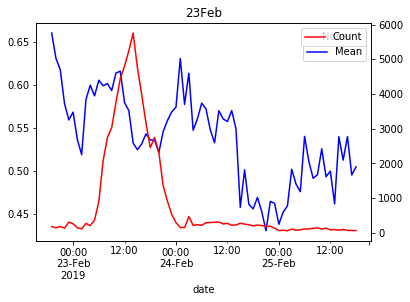

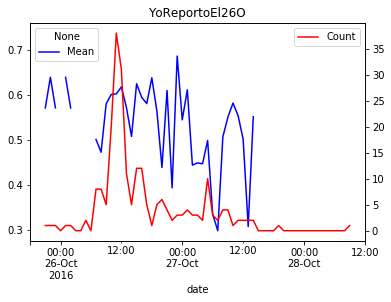

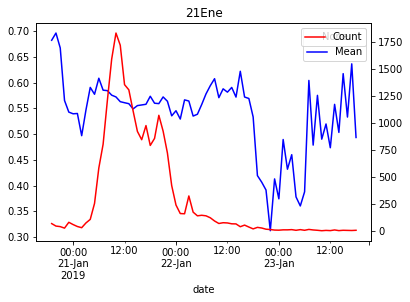

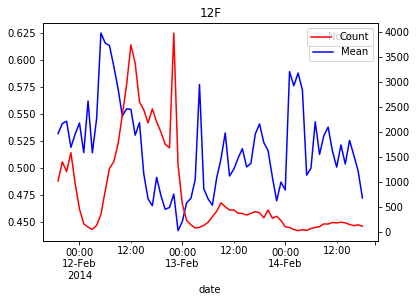

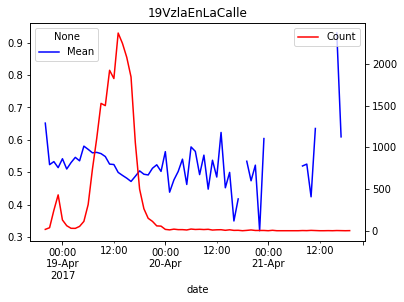

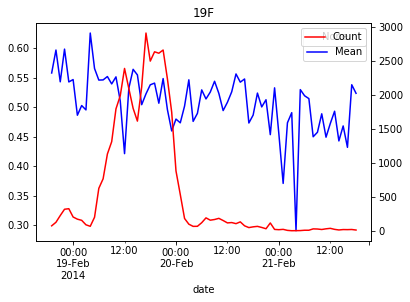

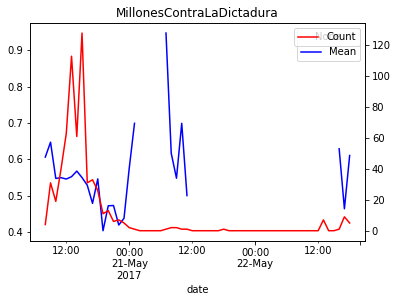

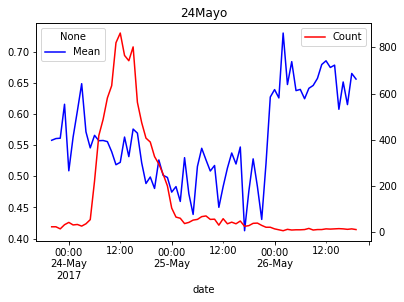

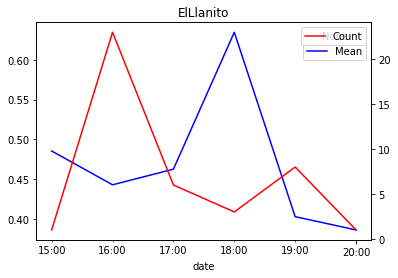

In [130]:
for filename in os.listdir(tar_dir):
    
    if filename.endswith(".csv"):
        
        path = tar_dir + '/' + filename
        title = os.path.splitext(filename)[0]
        title = title.split('_')[0]
        df = pd.read_csv(path, sep=',',error_bad_lines=False)
        df['date'] = pd.to_datetime(df.date)
        df = df.set_index('date')
        avg_sent_per_day = df.sentiment.resample('h').mean()
        count_sent_per_day = df.sentiment.resample('h').count()
        avg_sent_per_day.name = "Mean"
        count_sent_per_day.name = "Count"
        avg_sent_per_day.plot(color = 'blue', grid=False)
        plt.title(title)
        plt.legend(loc='upper left')
        plt.xlabel('Average Sentiment on Each Day')
        count_sent_per_day.plot(color='red',grid=False,secondary_y=True)
        plt.legend(loc='upper right')
        plt.savefig(title)
        plt.show()
        